# Univariate Interpolation, with different polynomial types

Most of the content of this notebook is from

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

Chapter 7

I changed and tested the code, so you will find differences from the original work of Mr. Johansson

In [1]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

In [2]:
import numpy as np
from numpy import polynomial as P
from scipy import interpolate
from scipy import linalg

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Power Polynomials

In [4]:
# You can define a polynomial object with the followings:
# 1 - with the coeffecients: P.Polynomial([1,2,3]) which is 1 + 2x + 3x^2
# 2 - with the roots:        P.Polynomial.fromroots([-0.33333333-0.47140452j, -0.33333333+0.47140452j])
print (P.Polynomial([1,2,3]))
print (P.Polynomial.fromroots([-0.33333333-0.47140452j, -0.33333333+0.47140452j]))

poly([1. 2. 3.])
poly([0.33333333+0.j 0.66666666+0.j 1.        +0.j])


In [5]:
# Poxer Basis Polynomial
# a representation of the polynomial 1 + 2x + 3x^2
p1 = P.Polynomial([1,2,3])

In [6]:
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [7]:
print (p1)
print (p1(1.5))
print (1+2*1.5+3*1.5**2)
print (p1(-1))
print (p1(1))

poly([1. 2. 3.])
10.75
10.75
2.0
6.0


In [8]:
# a representation of the polynomial -1 + x^2, which we can read from below
p2 = P.Polynomial.fromroots([-1, 1])

In [9]:
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [10]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [11]:
print (p1(p1.roots()[0]))
print (p1(p1.roots()[1]))

-2.7755575615628914e-16j
2.7755575615628914e-16j


In [12]:
p2.roots()

array([-1.,  1.])

In [13]:
print (p2(-1))
print (p2(1))

0.0
0.0


In [14]:
print (p1.coef)
print (p2.coef)

[1. 2. 3.]
[-1.  0.  1.]


In [15]:
p1.domain

array([-1,  1])

In [16]:
p1.window

array([-1,  1])

In [17]:
#p1([1.5, 2.5, 3.5])

In [18]:
p1+p2

Polynomial([0., 2., 4.], domain=[-1.,  1.], window=[-1.,  1.])

In [19]:
p2 / 5

Polynomial([-0.2,  0. ,  0.2], domain=[-1.,  1.], window=[-1.,  1.])

In [20]:
P.Polynomial.fromroots([1, 2, 3])

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [21]:
p1 = P.Polynomial.fromroots([1, 2, 3])

In [22]:
p1

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [23]:
p2 = P.Polynomial.fromroots([2])

In [24]:
p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [25]:
p3 = p1 // p2

In [26]:
p3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [27]:
p3.roots()

array([1., 3.])

In [28]:
p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

# Chebyshev  Polynomials

In [29]:
# You can define a polynomial object with the followings:
# 1 - with the coeffecients: P.Chebyshev([1,2,3]) which is 1 + 2x + 3x^2
# 2 - with the roots:        P.Chebyshev([-0.76759188,  0.43425855])
print (P.Chebyshev([1,2,3]))
print (P.Chebyshev.fromroots([-0.76759188,  0.43425855]))

cheb([1. 2. 3.])
cheb([0.16666666 0.33333333 0.5       ])


In [30]:
c1 = P.Chebyshev([1, 2, 3])

In [31]:
c1

Chebyshev([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [32]:
c1.roots()

array([-0.76759188,  0.43425855])

In [33]:
c = P.Chebyshev.fromroots([-1, 1])

In [34]:
c

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.])

# Legendre Polynomial

In [35]:
# You can define a polynomial object with the followings:
# 1 - with the coeffecients: P.Legendre([-1,1]) 
# 2 - with the roots:        P.Legendre([-0.33333333-0.47140452j, -0.33333333+0.47140452j])
print (P.Legendre([-0.66666667,  0.        ,  0.66666667]))
print (P.Legendre.fromroots([-1,1]))

leg([-0.66666667  0.          0.66666667])
leg([-0.66666667  0.          0.66666667])


In [36]:
l = P.Legendre.fromroots([-1, 1])

In [37]:
l

Legendre([-0.66666667,  0.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.])

In [38]:
print (l.roots())

[-1.  1.]


# Polynomial interpolation

In [39]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

In [40]:
deg = len(x) - 1
print (deg)

3


In [41]:
import numpy.linalg

In [42]:
A = P.polynomial.polyvander(x, deg)
print (A)
print (np.dot(A[:,1], A[:,2]))
print (numpy.linalg.matrix_rank(A))

[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]
100.0
4


In [43]:
c = numpy.linalg.solve(A, y)

In [44]:
c

array([ 2. , -3.5,  3. , -0.5])

In [45]:
f1 = P.Polynomial(c)

In [46]:
print (f1(2.5))
print (f1(3))

4.187499999999998
4.999999999999999


In [47]:
A = P.chebyshev.chebvander(x, deg)
print (A)
print (np.dot(A[:,1], A[:,2]))
print (numpy.linalg.matrix_rank(A))

[[  1.   1.   1.   1.]
 [  1.   2.   7.  26.]
 [  1.   3.  17.  99.]
 [  1.   4.  31. 244.]]
190.0
4


In [48]:
c = numpy.linalg.solve(A, y)

In [49]:
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [50]:
f2 = P.Chebyshev(c)

In [51]:
print (f2(2.5))
print (f2(3))

4.187499999999999
5.0


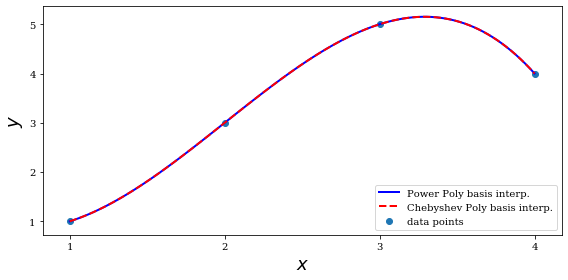

In [52]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'b'  , lw=2, label='Power Poly basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev Poly basis interp.')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
fig.tight_layout()


In [53]:
f1b = P.Polynomial.fit(x, y, deg)
f2b = P.Chebyshev.fit(x, y, deg)
f3b = P.Legendre.fit(x, y, deg)

print (f1b)
print (f2b)
print (f3b)

poly([ 4.1875  3.1875 -1.6875 -1.6875])
cheb([ 3.34375   1.921875 -0.84375  -0.421875])
leg([ 3.625  2.175 -1.125 -0.675])


In [54]:
print (np.linalg.cond(P.chebyshev.chebvander(x, deg)))
print (np.linalg.cond(P.polynomial.polyvander(x, deg)))

4659.738424140432
1171.0126859149525


In [55]:
print (np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3.0, deg)))
print (np.linalg.cond(P.polynomial.polyvander((2*x-5)/3.0, deg)))

1.8542033440472903
8.011561047197162


In [56]:
(2 * x - 5)/3.0

array([-1.        , -0.33333333,  0.33333333,  1.        ])

In [57]:
f1 = P.Polynomial.fit(x, y, 1)
f2 = P.Polynomial.fit(x, y, 2)
f3 = P.Polynomial.fit(x, y, 3)

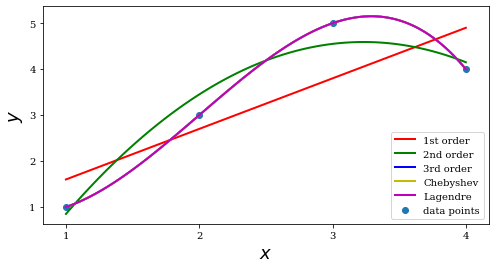

In [58]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'r', lw=2, label='1st order')
ax.plot(xx, f2(xx), 'g', lw=2, label='2nd order')
ax.plot(xx, f3(xx), 'b', lw=2, label='3rd order')
ax.plot(xx, f2b(xx), 'y', lw=2, label='Chebyshev')
ax.plot(xx, f3b(xx), 'm', lw=2, label='Lagendre')
ax.scatter(x, y, label='data points')
ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18);

## Runge problem with Chebyshev and Power Polynomials

In [59]:
def runge(x):
    return 1/(1 + 25 * x**2)

In [60]:
def runge_interpolate(n):
    x = np.linspace(-1, 1, n+1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p
print (runge_interpolate(13)[1])

poly([ 9.57213877e-01  1.75111219e-13 -1.52674461e+01 -6.53665799e-12
  1.24636817e+02  7.48456025e-11 -5.07215504e+02 -3.82202901e-10
  1.03616040e+03  9.05989156e-10 -1.00823965e+03 -9.71769581e-10
  3.69006630e+02  3.79214565e-10])


In [61]:
def runge_interpolate_Chebyshev(n):
    x = np.linspace(-1, 1, n+1)
    p = P.Chebyshev.fit(x, runge(x), deg=n)
    return x, p
print (runge_interpolate_Chebyshev(13)[1])

cheb([ 3.79206790e-03  2.77498653e-15 -5.86417887e-01  1.91274194e-15
  1.92289678e-02  9.56666048e-17 -6.58884310e-02 -1.59429042e-15
  2.94637654e-01 -2.39027046e-15  1.92930149e-01 -1.85895527e-15
  1.80179018e-01 -9.45060633e-16])


In [62]:
xx = np.linspace(-1, 1, 250)

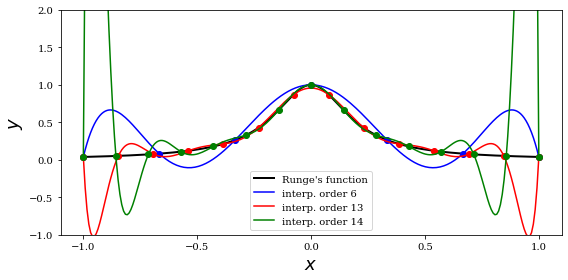

In [63]:
# Different Degree Power Polynomial
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")

n = 6
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'bo')
ax.plot(xx, p(xx), 'b', label='interp. order %d' % n)

n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)

n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()


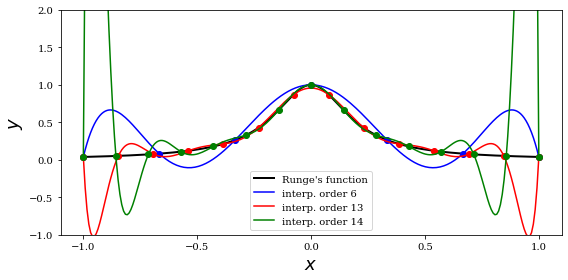

In [64]:
# Different Degree Chebyshev Polynomial
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")

n = 6
x, p = runge_interpolate_Chebyshev(n)
ax.plot(x, runge(x), 'bo')
ax.plot(xx, p(xx), 'b', label='interp. order %d' % n)

n = 13
x, p = runge_interpolate_Chebyshev(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)

n = 14
x, p = runge_interpolate_Chebyshev(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

# Runge problem with Spline interpolation

Spline Interpolation on the runge(x) function

In [65]:
x = np.linspace(-1, 1, 11)

In [66]:
x_random = np.random.randn(11)/50.0
y_r = runge(x + x_random)
y   = runge(x)

In [67]:
# interpolate.interp1d is the spline
f  = interpolate.interp1d(x, y, kind=3)
f5 = interpolate.interp1d(x, y, kind=5)
f_random3  = interpolate.interp1d(x, y_r, kind=3)

In [68]:
xx = np.linspace(-1, 1, 100)

In [69]:
print (f(xx))

[0.03846154 0.04064473 0.04269833 0.04466077 0.04657046 0.04846583
 0.0503853  0.05236729 0.05445023 0.05667254 0.05907263 0.06168895
 0.06455989 0.0677239  0.07121938 0.07508477 0.07935849 0.08407895
 0.08928458 0.09501381 0.10130506 0.10819803 0.11573526 0.12395968
 0.1329142  0.14264175 0.15318525 0.16458763 0.1768918  0.19014069
 0.20438    0.21987131 0.23724204 0.25715507 0.28027328 0.30725953
 0.33877671 0.37548769 0.41805534 0.46714254 0.52337635 0.58599169
 0.65241497 0.7199518  0.78590774 0.84758836 0.90229925 0.94734599
 0.98003415 0.9976693  0.9976693  0.98003415 0.94734599 0.90229925
 0.84758836 0.78590774 0.7199518  0.65241497 0.58599169 0.52337635
 0.46714254 0.41805534 0.37548769 0.33877671 0.30725953 0.28027328
 0.25715507 0.23724204 0.21987131 0.20438    0.19014069 0.1768918
 0.16458763 0.15318525 0.14264175 0.1329142  0.12395968 0.11573526
 0.10819803 0.10130506 0.09501381 0.08928458 0.08407895 0.07935849
 0.07508477 0.07121938 0.0677239  0.06455989 0.06168895 0.05907

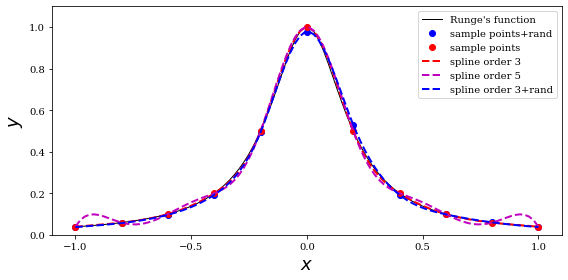

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y_r, 'bo', label='sample points+rand')
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f(xx), 'r--', lw=2, label='spline order 3')
ax.plot(xx, f5(xx), 'm--', lw=2, label='spline order 5')
ax.plot(xx, f_random3(xx), 'b--', lw=2, label='spline order 3+rand')


ax.legend()
ax.set_ylim(0, 1.1)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

# Spline Interpolation on new dataset

In [71]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [72]:
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])

In [73]:
xx = np.linspace(x.min(), x.max(), 100)

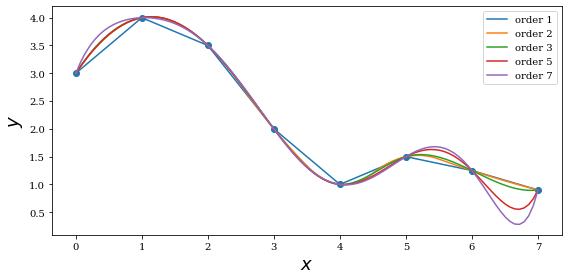

In [74]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y)

for n in [1, 2, 3, 5, 7]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label='order %d' % n)

ax.legend()
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()